In [1]:

## Latent semantic discovery or vectors
## K-Means


In [25]:

import sklearn
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt



In [39]:

examples = ['Machine learning and python are super fun',
            'Python is super, super cool',
            'Statistics and data science are cool too',
            'Data science and python are fun',
            'Python is great for machine learning',
            'I like football and it is great',
            'Football is great to watch and I like it'
]


In [40]:


vectorizer = CountVectorizer(min_df=1, stop_words='english')




In [41]:

dtm = vectorizer.fit_transform(examples)


In [42]:

dtm_pd = pd.DataFrame( dtm.toarray(), index=examples, columns=vectorizer.get_feature_names_out()  ).head(10)
dtm_pd


,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning and python are super fun,0,0,0,1,0,1,0,1,1,0,0,1,0
"Python is super, super cool",1,0,0,0,0,0,0,0,1,0,0,2,0
Statistics and data science are cool too,1,1,0,0,0,0,0,0,0,1,1,0,0
Data science and python are fun,0,1,0,1,0,0,0,0,1,1,0,0,0
Python is great for machine learning,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football and it is great,0,0,1,0,1,0,1,0,0,0,0,0,0
Football is great to watch and I like it,0,0,1,0,1,0,1,0,0,0,0,0,1



## SVD 


In [43]:

lsa = TruncatedSVD(2)


In [44]:

dtm_lsa = lsa.fit_transform(  dtm  )


In [45]:

svd_dtm_pd = pd.DataFrame( dtm_lsa, index=examples, columns=["SVD1", "SV2"]  ).head(10)
svd_dtm_pd


,SVD1,SV2
Machine learning and python are super fun,1.979472,-0.150992
"Python is super, super cool",1.812955,-0.560846
Statistics and data science are cool too,0.597415,-0.425300
Data science and python are fun,1.187839,-0.346121
Python is great for machine learning,1.361527,0.693632
I like football and it is great,0.288973,1.569819
Football is great to watch and I like it,0.317838,1.833816


In [46]:

## C1 = w1*t1 + w2*t2 + ... + wn*t



## Plot


In [47]:

xs = [ w[0] for w in dtm_lsa ]
ys = [ w[1] for w in dtm_lsa ]


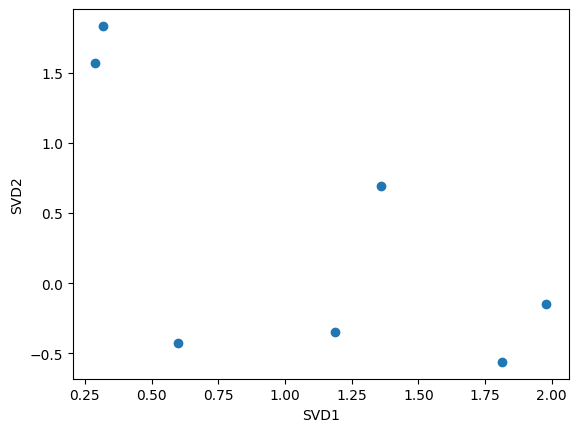

In [48]:

plt.scatter(xs, ys)
plt.xlabel("SVD1")
plt.ylabel("SVD2")
plt.show()


In [49]:

from sklearn.cluster import KMeans


In [50]:

km_lsa = KMeans(
       n_clusters=2,
       init='random',
       n_init=10,
       max_iter=300,
       ## to1=1e-04,
       random_state=0
)


In [51]:

y_lsa = km_lsa.fit_predict(dtm_lsa)


In [52]:

y_lsa.shape


(7,)

In [53]:

y_lsa


array([0, 0, 0, 0, 0, 1, 1])

In [56]:

X = dtm_lsa


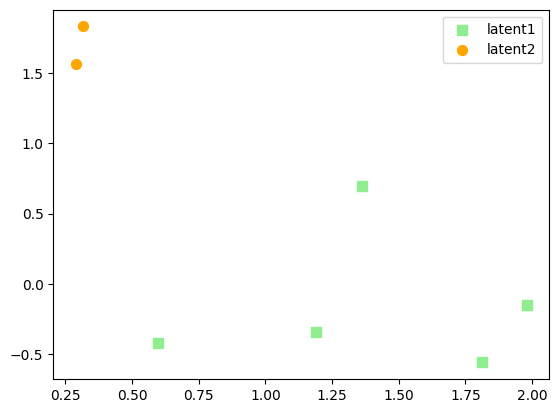

In [57]:

plt.scatter(
    X[ y_lsa==0 , 0],
    X[ y_lsa==0 , 1],
    s=50,
    c='lightgreen',
    marker='s',
    label='latent1'
)
plt.scatter(
    X[ y_lsa==1 , 0],
    X[ y_lsa==1 , 1],
    s=50,
    c='orange',
    marker='o',
    label='latent2'
)
plt.legend()
plt.show()


